In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configure matplotlib for better looking plots (for static plots if needed)
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print("Libraries loaded successfully!")
print("Using Plotly for interactive plots with zoom, pan, and hover features.")

In [13]:
# CONFIGURATION: Update this path to your sensor data file
# You can use a specific file or use glob pattern to find the latest file

# Option 1: Specify a specific file
# filename = 'sensor_data_20231201_120000.csv'

# Option 2: Automatically find the most recent sensor data file
sensor_files = glob.glob('sensor_data_*.csv')
if sensor_files:
    filename = max(sensor_files, key=os.path.getctime)  # Get the most recent file
    print(f"Loading most recent file: {filename}")
else:
    # Default to a placeholder - update this path!
    filename = 'sensor_data.csv'
    print(f"No sensor_data_*.csv files found. Using default: {filename}")
    print("Please update the filename variable with the path to your data file.")

Loading most recent file: sensor_data_20251104_114654.csv


In [14]:
# Load the sensor data
try:
    df = pd.read_csv(filename)
    
    # Convert timestamp from milliseconds to seconds for better readability
    df['time_s'] = df['timestamp_ms'] / 1000.0
    
    print(f"Data loaded successfully!")
    print(f"Total samples: {len(df)}")
    print(f"Duration: {df['time_s'].max():.2f} seconds")
    print(f"\nFirst few rows:")
    display(df.head())
    
    print(f"\nData statistics:")
    display(df.describe())
    
except FileNotFoundError:
    print(f"Error: File '{filename}' not found.")
    print("Please update the filename variable in the previous cell.")
except Exception as e:
    print(f"Error loading data: {e}")

Data loaded successfully!
Total samples: 1970890
Duration: 9854.45 seconds

First few rows:


,timestamp_ms,ax_g,ay_g,az_g,gx_dps,gy_dps,gz_dps,mx_gauss,my_gauss,mz_gauss,temp_c,time_s
0,3,-0.070760,0.062830,-1.011690,0.15750,-0.9625,-3.99000,-0.41256,0.12072,-0.39712,27.00,0.003
1,8,-0.070760,0.062830,-1.011690,0.15750,-0.9625,-3.99000,-0.41288,0.12296,-0.40360,27.75,0.008
2,13,-0.070150,0.063257,-1.017540,-0.48125,-1.1900,-4.15625,-0.41288,0.12296,-0.40360,27.75,0.013
3,18,-0.070150,0.063257,-1.017540,-0.48125,-1.1900,-4.15625,-0.41264,0.12160,-0.39360,27.50,0.018
4,23,-0.062281,0.063013,-0.969473,-0.09625,-2.0125,-3.77125,-0.41264,0.12160,-0.39360,27.50,0.023



Data statistics:


,timestamp_ms,ax_g,ay_g,az_g,gx_dps,gy_dps,gz_dps,mx_gauss,my_gauss,mz_gauss,temp_c,time_s
count,1.970890e+06,1.970890e+06,1.970890e+06,1.970890e+06,1.970890e+06,1.970890e+06,1.970890e+06,1.970890e+06,1.970890e+06,1.970890e+06,1.970890e+06,1.970890e+06
mean,4.927226e+06,-6.948422e-02,6.116834e-02,-1.016477e+00,-2.442374e-02,-1.709395e+00,-3.819744e+00,-4.093227e-01,1.203405e-01,-3.967695e-01,2.861460e+01,4.927226e+03
std,2.844735e+06,1.528567e-03,1.536181e-03,2.712466e-03,2.989405e-01,2.540938e-01,3.091457e-01,2.328128e-03,1.889869e-03,5.523685e-03,6.809896e-01,2.844735e+03
min,3.000000e+00,-7.771400e-02,4.684800e-02,-1.030660e+00,-2.240000e+00,-4.480000e+00,-6.720000e+00,-4.299200e-01,1.024000e-01,-4.300000e-01,2.675000e+01,3.000000e-03
25%,2.463614e+06,-7.051600e-02,6.032900e-02,-1.018150e+00,-1.925000e-01,-1.881250e+00,-4.033750e+00,-4.118400e-01,1.188800e-01,-4.004000e-01,2.800000e+01,2.463614e+03
50%,4.927226e+06,-6.947900e-02,6.118300e-02,-1.016500e+00,-2.625000e-02,-1.706250e+00,-3.806250e+00,-4.081600e-01,1.197600e-01,-3.968000e-01,2.875000e+01,4.927227e+03
75%,7.390837e+06,-6.844200e-02,6.203700e-02,-1.014860e+00,1.400000e-01,-1.540000e+00,-3.596250e+00,-4.073600e-01,1.220800e-01,-3.931200e-01,2.912500e+01,7.390837e+03
max,9.854448e+06,-6.112200e-02,7.801900e-02,-9.694730e-01,2.231250e+00,-8.750000e-03,-2.248750e+00,-3.892000e-01,1.432800e-01,-3.682400e-01,3.025000e+01,9.854448e+03


## Interactive Plotly Visualization

**Features:**
- 🔍 **Zoom:** Click and drag to select an area, or use scroll wheel
- 👆 **Pan:** Click and drag after zooming
- 🏠 **Reset:** Double-click to reset view
- 👁️ **Hover:** Mouse over data points to see exact values
- 📊 **Toggle:** Click legend items to show/hide traces
- 💾 **Export:** Click camera icon to save as PNG

This interactive plot allows you to explore all sensor data in detail.

In [ ]:
# Create interactive Plotly figure with 4 subplots (one for each sensor type)
fig = make_subplots(
    rows=4, cols=1,
    subplot_titles=('Gyroscope (Angular Rate)', 'Accelerometer', 'Magnetometer', 'Temperature'),
    vertical_spacing=0.08,
    row_heights=[0.25, 0.25, 0.25, 0.25]
)

# Gyroscope traces
fig.add_trace(go.Scatter(x=df['time_s'], y=df['gx_dps'], name='Gyro X', 
                         line=dict(color='#1f77b4', width=1), 
                         hovertemplate='Time: %{x:.3f}s<br>Gyro X: %{y:.2f}°/s<extra></extra>'),
              row=1, col=1)
fig.add_trace(go.Scatter(x=df['time_s'], y=df['gy_dps'], name='Gyro Y', 
                         line=dict(color='#ff7f0e', width=1),
                         hovertemplate='Time: %{x:.3f}s<br>Gyro Y: %{y:.2f}°/s<extra></extra>'),
              row=1, col=1)
fig.add_trace(go.Scatter(x=df['time_s'], y=df['gz_dps'], name='Gyro Z', 
                         line=dict(color='#2ca02c', width=1),
                         hovertemplate='Time: %{x:.3f}s<br>Gyro Z: %{y:.2f}°/s<extra></extra>'),
              row=1, col=1)

# Accelerometer traces
fig.add_trace(go.Scatter(x=df['time_s'], y=df['ax_g'], name='Accel X', 
                         line=dict(color='#1f77b4', width=1),
                         hovertemplate='Time: %{x:.3f}s<br>Accel X: %{y:.3f}g<extra></extra>'),
              row=2, col=1)
fig.add_trace(go.Scatter(x=df['time_s'], y=df['ay_g'], name='Accel Y', 
                         line=dict(color='#ff7f0e', width=1),
                         hovertemplate='Time: %{x:.3f}s<br>Accel Y: %{y:.3f}g<extra></extra>'),
              row=2, col=1)
fig.add_trace(go.Scatter(x=df['time_s'], y=df['az_g'], name='Accel Z', 
                         line=dict(color='#2ca02c', width=1),
                         hovertemplate='Time: %{x:.3f}s<br>Accel Z: %{y:.3f}g<extra></extra>'),
              row=2, col=1)

# Add 1g reference lines for accelerometer
fig.add_hline(y=1.0, line_dash="dash", line_color="gray", opacity=0.5, row=2, col=1)
fig.add_hline(y=-1.0, line_dash="dash", line_color="gray", opacity=0.5, row=2, col=1)

# Magnetometer traces
fig.add_trace(go.Scatter(x=df['time_s'], y=df['mx_gauss'], name='Mag X', 
                         line=dict(color='#1f77b4', width=1),
                         hovertemplate='Time: %{x:.3f}s<br>Mag X: %{y:.3f} gauss<extra></extra>'),
              row=3, col=1)
fig.add_trace(go.Scatter(x=df['time_s'], y=df['my_gauss'], name='Mag Y', 
                         line=dict(color='#ff7f0e', width=1),
                         hovertemplate='Time: %{x:.3f}s<br>Mag Y: %{y:.3f} gauss<extra></extra>'),
              row=3, col=1)
fig.add_trace(go.Scatter(x=df['time_s'], y=df['mz_gauss'], name='Mag Z', 
                         line=dict(color='#2ca02c', width=1),
                         hovertemplate='Time: %{x:.3f}s<br>Mag Z: %{y:.3f} gauss<extra></extra>'),
              row=3, col=1)

# Temperature trace
fig.add_trace(go.Scatter(x=df['time_s'], y=df['temp_c'], name='Temperature', 
                         line=dict(color='red', width=2),
                         hovertemplate='Time: %{x:.3f}s<br>Temp: %{y:.2f}°C<extra></extra>'),
              row=4, col=1)

# Update axes labels
fig.update_xaxes(title_text="Time (seconds)", row=4, col=1)
fig.update_yaxes(title_text="°/s", row=1, col=1)
fig.update_yaxes(title_text="g", row=2, col=1)
fig.update_yaxes(title_text="gauss", row=3, col=1)
fig.update_yaxes(title_text="°C", row=4, col=1)

# Update layout
fig.update_layout(
    height=1000,
    showlegend=True,
    title_text="LSM9DS0 Sensor Data - Interactive View",
    hovermode='x unified',
    template='plotly_white'
)

# Show the figure
fig.show()

print(f"\n✅ Interactive plot generated!")
print(f"📊 Try these features:")
print(f"  • Zoom: Click and drag to select an area")
print(f"  • Pan: Shift + drag to pan")
print(f"  • Reset: Double-click to reset view")
print(f"  • Toggle: Click legend items to show/hide traces")
print(f"  • Export: Click camera icon (top right) to save as PNG")

## Plot 1: Gyroscope Data
Rotation rates in degrees per second around x, y, and z axes

fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df['time_s'], df['gx_dps'], label='Gyro X', alpha=0.7, linewidth=1)
ax.plot(df['time_s'], df['gy_dps'], label='Gyro Y', alpha=0.7, linewidth=1)
ax.plot(df['time_s'], df['gz_dps'], label='Gyro Z', alpha=0.7, linewidth=1)

ax.set_xlabel('Time (seconds)', fontsize=12)
ax.set_ylabel('Angular Rate (degrees/second)', fontsize=12)
ax.set_title('Gyroscope Data: Angular Rates vs Time', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("Gyroscope Statistics:")
print(f"  X-axis: mean={df['gx_dps'].mean():.2f}, std={df['gx_dps'].std():.2f}, range=[{df['gx_dps'].min():.2f}, {df['gx_dps'].max():.2f}]")
print(f"  Y-axis: mean={df['gy_dps'].mean():.2f}, std={df['gy_dps'].std():.2f}, range=[{df['gy_dps'].min():.2f}, {df['gy_dps'].max():.2f}]")
print(f"  Z-axis: mean={df['gz_dps'].mean():.2f}, std={df['gz_dps'].std():.2f}, range=[{df['gz_dps'].min():.2f}, {df['gz_dps'].max():.2f}]")

# LSM9DS0 Sensor Data Visualization

This notebook provides visualization tools for the 9-DOF sensor data collected from the LSM9DS0.

## Data Format
The CSV file contains the following columns:
- `timestamp_ms`: Time in milliseconds since start
- `ax_g, ay_g, az_g`: Accelerometer data (g's)
- `gx_dps, gy_dps, gz_dps`: Gyroscope data (degrees per second)
- `mx_gauss, my_gauss, mz_gauss`: Magnetometer data (gauss)
- `temp_c`: Temperature (Celsius)

## Usage
1. Update the `filename` variable below to point to your sensor data CSV file
2. Run all cells to generate the 4 plots:
   - Gyroscope (x, y, z vs time)
   - Accelerometer (x, y, z vs time)
   - Magnetometer (x, y, z vs time)
   - Temperature (temp vs time)

## Plot 2: Accelerometer Data
Acceleration in g's along x, y, and z axes

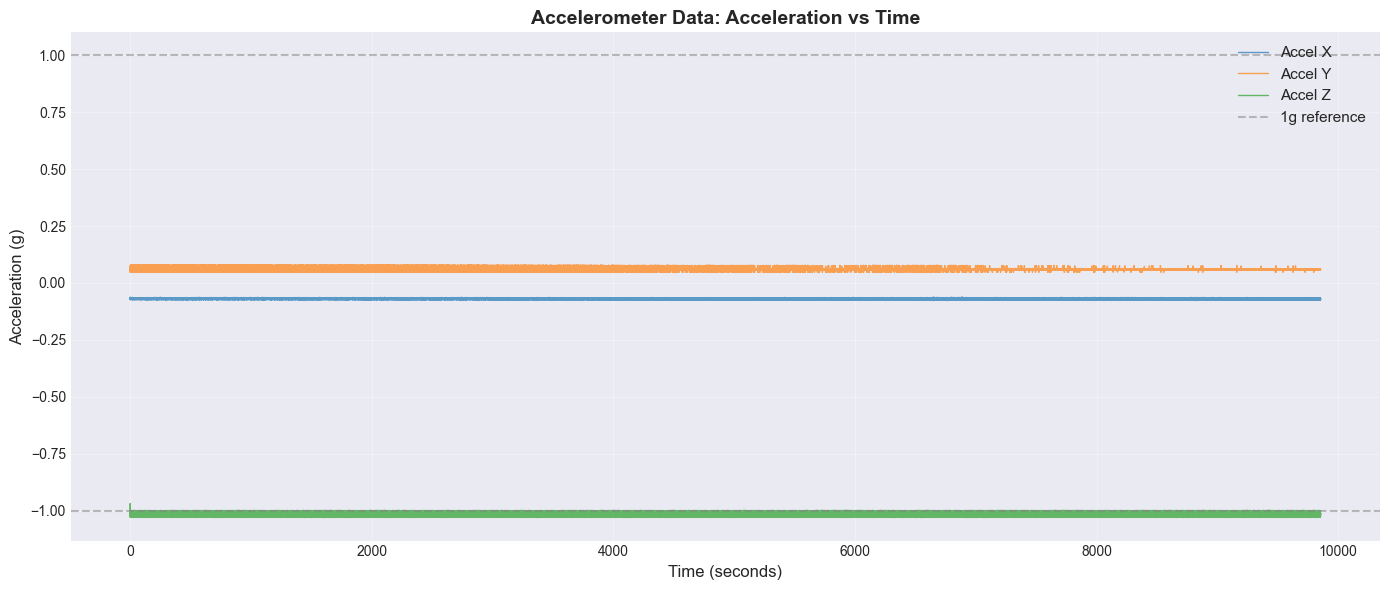

Accelerometer Statistics:
  X-axis: mean=-0.069, std=0.002, range=[-0.078, -0.061]
  Y-axis: mean=0.061, std=0.002, range=[0.047, 0.078]
  Z-axis: mean=-1.016, std=0.003, range=[-1.031, -0.969]


In [15]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df['time_s'], df['ax_g'], label='Accel X', alpha=0.7, linewidth=1)
ax.plot(df['time_s'], df['ay_g'], label='Accel Y', alpha=0.7, linewidth=1)
ax.plot(df['time_s'], df['az_g'], label='Accel Z', alpha=0.7, linewidth=1)

# Add reference line at 1g
ax.axhline(y=1.0, color='gray', linestyle='--', alpha=0.5, label='1g reference')
ax.axhline(y=-1.0, color='gray', linestyle='--', alpha=0.5)

ax.set_xlabel('Time (seconds)', fontsize=12)
ax.set_ylabel('Acceleration (g)', fontsize=12)
ax.set_title('Accelerometer Data: Acceleration vs Time', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("Accelerometer Statistics:")
print(f"  X-axis: mean={df['ax_g'].mean():.3f}, std={df['ax_g'].std():.3f}, range=[{df['ax_g'].min():.3f}, {df['ax_g'].max():.3f}]")
print(f"  Y-axis: mean={df['ay_g'].mean():.3f}, std={df['ay_g'].std():.3f}, range=[{df['ay_g'].min():.3f}, {df['ay_g'].max():.3f}]")
print(f"  Z-axis: mean={df['az_g'].mean():.3f}, std={df['az_g'].std():.3f}, range=[{df['az_g'].min():.3f}, {df['az_g'].max():.3f}]")

## Plot 3: Magnetometer Data
Magnetic field strength in gauss along x, y, and z axes

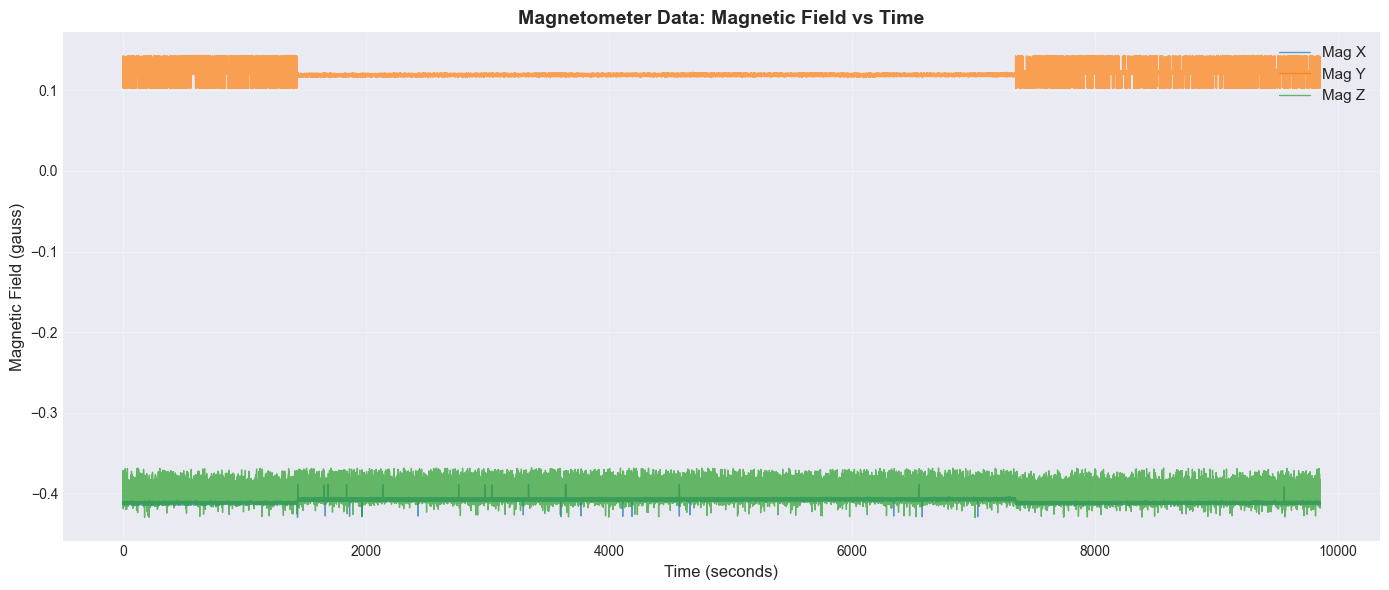

Magnetometer Statistics:
  X-axis: mean=-0.409, std=0.002, range=[-0.430, -0.389]
  Y-axis: mean=0.120, std=0.002, range=[0.102, 0.143]
  Z-axis: mean=-0.397, std=0.006, range=[-0.430, -0.368]

  Total magnitude: mean=0.583, std=0.005


In [16]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df['time_s'], df['mx_gauss'], label='Mag X', alpha=0.7, linewidth=1)
ax.plot(df['time_s'], df['my_gauss'], label='Mag Y', alpha=0.7, linewidth=1)
ax.plot(df['time_s'], df['mz_gauss'], label='Mag Z', alpha=0.7, linewidth=1)

ax.set_xlabel('Time (seconds)', fontsize=12)
ax.set_ylabel('Magnetic Field (gauss)', fontsize=12)
ax.set_title('Magnetometer Data: Magnetic Field vs Time', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("Magnetometer Statistics:")
print(f"  X-axis: mean={df['mx_gauss'].mean():.3f}, std={df['mx_gauss'].std():.3f}, range=[{df['mx_gauss'].min():.3f}, {df['mx_gauss'].max():.3f}]")
print(f"  Y-axis: mean={df['my_gauss'].mean():.3f}, std={df['my_gauss'].std():.3f}, range=[{df['my_gauss'].min():.3f}, {df['my_gauss'].max():.3f}]")
print(f"  Z-axis: mean={df['mz_gauss'].mean():.3f}, std={df['mz_gauss'].std():.3f}, range=[{df['mz_gauss'].min():.3f}, {df['mz_gauss'].max():.3f}]")

# Calculate total magnetic field magnitude
df['mag_magnitude'] = np.sqrt(df['mx_gauss']**2 + df['my_gauss']**2 + df['mz_gauss']**2)
print(f"\n  Total magnitude: mean={df['mag_magnitude'].mean():.3f}, std={df['mag_magnitude'].std():.3f}")

## Plot 4: Temperature Data
Temperature sensor readings in Celsius

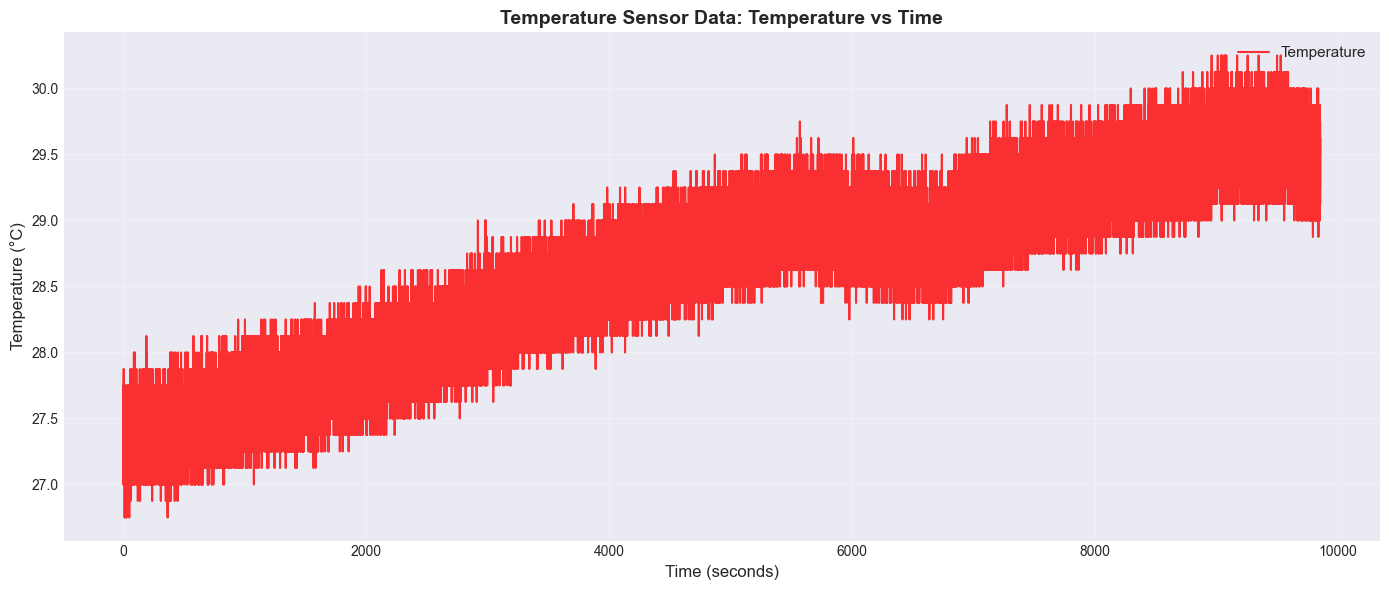

Temperature Statistics:
  Mean: 28.61°C
  Std:  0.68°C
  Min:  26.75°C
  Max:  30.25°C
  Range: 3.50°C


In [17]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df['time_s'], df['temp_c'], label='Temperature', alpha=0.8, linewidth=1.5, color='red')

ax.set_xlabel('Time (seconds)', fontsize=12)
ax.set_ylabel('Temperature (°C)', fontsize=12)
ax.set_title('Temperature Sensor Data: Temperature vs Time', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("Temperature Statistics:")
print(f"  Mean: {df['temp_c'].mean():.2f}°C")
print(f"  Std:  {df['temp_c'].std():.2f}°C")
print(f"  Min:  {df['temp_c'].min():.2f}°C")
print(f"  Max:  {df['temp_c'].max():.2f}°C")
print(f"  Range: {df['temp_c'].max() - df['temp_c'].min():.2f}°C")

## Optional: Combined View
All sensors in a single figure with subplots

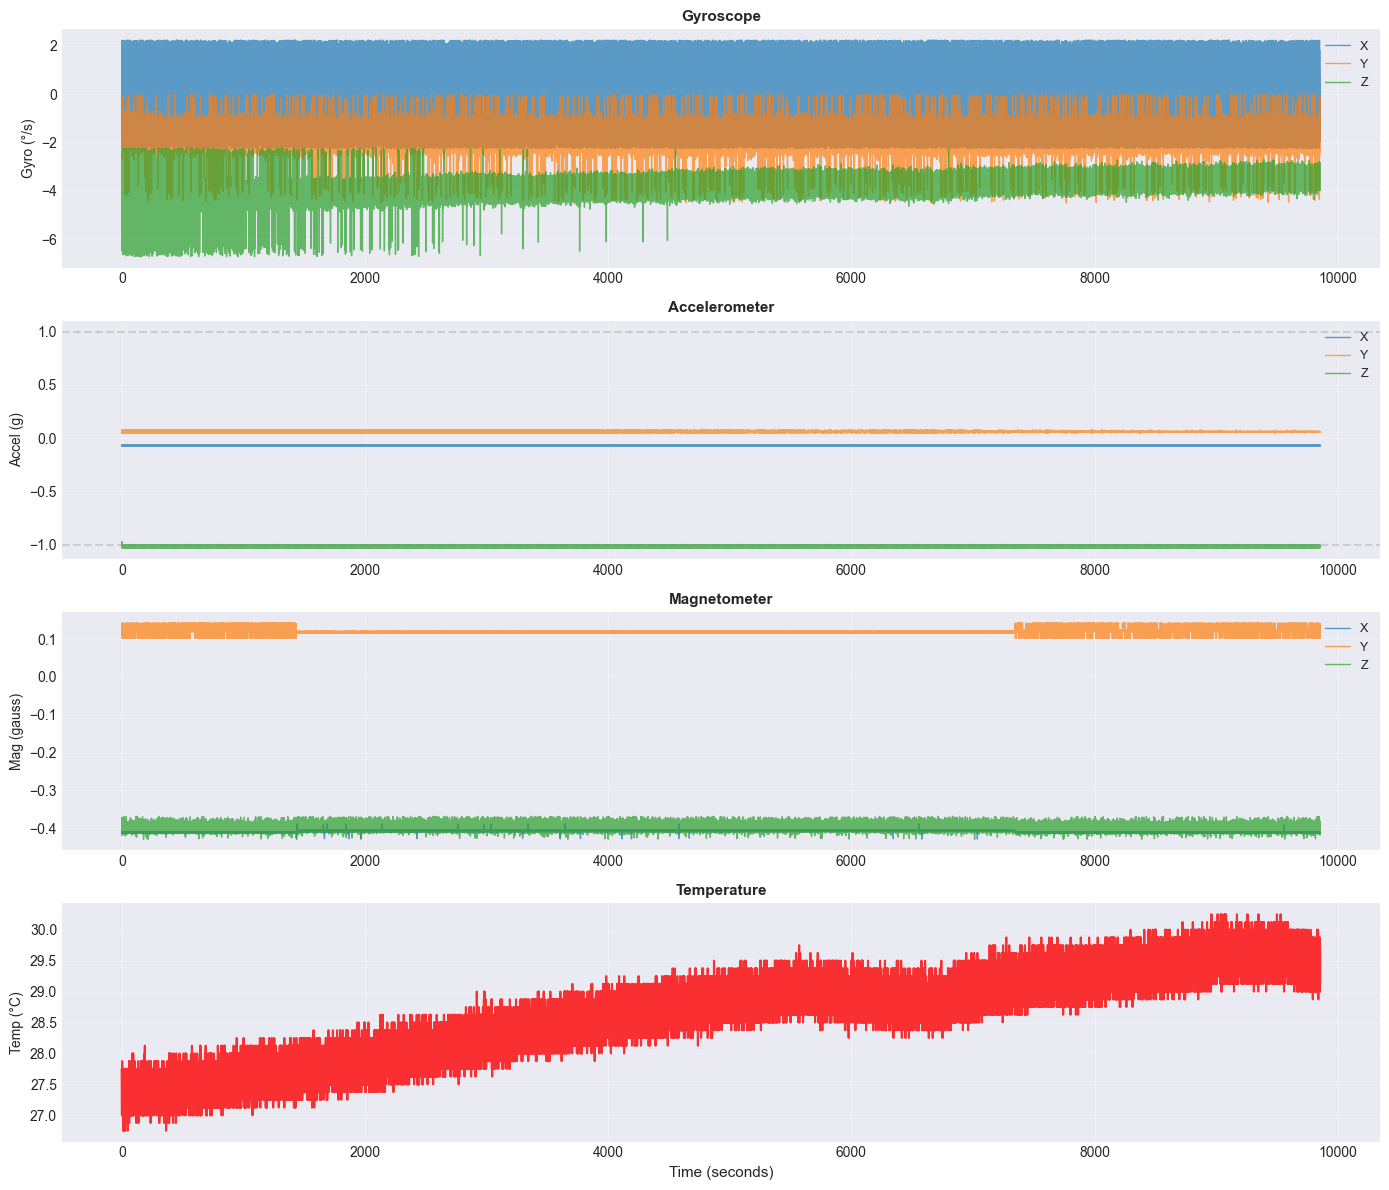

In [18]:
fig, axes = plt.subplots(4, 1, figsize=(14, 12))

# Gyroscope
axes[0].plot(df['time_s'], df['gx_dps'], label='X', alpha=0.7, linewidth=1)
axes[0].plot(df['time_s'], df['gy_dps'], label='Y', alpha=0.7, linewidth=1)
axes[0].plot(df['time_s'], df['gz_dps'], label='Z', alpha=0.7, linewidth=1)
axes[0].set_ylabel('Gyro (°/s)', fontsize=10)
axes[0].set_title('Gyroscope', fontsize=11, fontweight='bold')
axes[0].legend(loc='upper right', fontsize=9)
axes[0].grid(True, alpha=0.3)

# Accelerometer
axes[1].plot(df['time_s'], df['ax_g'], label='X', alpha=0.7, linewidth=1)
axes[1].plot(df['time_s'], df['ay_g'], label='Y', alpha=0.7, linewidth=1)
axes[1].plot(df['time_s'], df['az_g'], label='Z', alpha=0.7, linewidth=1)
axes[1].axhline(y=1.0, color='gray', linestyle='--', alpha=0.3)
axes[1].axhline(y=-1.0, color='gray', linestyle='--', alpha=0.3)
axes[1].set_ylabel('Accel (g)', fontsize=10)
axes[1].set_title('Accelerometer', fontsize=11, fontweight='bold')
axes[1].legend(loc='upper right', fontsize=9)
axes[1].grid(True, alpha=0.3)

# Magnetometer
axes[2].plot(df['time_s'], df['mx_gauss'], label='X', alpha=0.7, linewidth=1)
axes[2].plot(df['time_s'], df['my_gauss'], label='Y', alpha=0.7, linewidth=1)
axes[2].plot(df['time_s'], df['mz_gauss'], label='Z', alpha=0.7, linewidth=1)
axes[2].set_ylabel('Mag (gauss)', fontsize=10)
axes[2].set_title('Magnetometer', fontsize=11, fontweight='bold')
axes[2].legend(loc='upper right', fontsize=9)
axes[2].grid(True, alpha=0.3)

# Temperature
axes[3].plot(df['time_s'], df['temp_c'], alpha=0.8, linewidth=1.5, color='red')
axes[3].set_ylabel('Temp (°C)', fontsize=10)
axes[3].set_xlabel('Time (seconds)', fontsize=11)
axes[3].set_title('Temperature', fontsize=11, fontweight='bold')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Optional: Rolling Average Analysis
Compute and visualize rolling averages to see trends more clearly

In [19]:
# Configure rolling window size (in number of samples)
# At 200 Hz, a window of 200 samples = 1 second
window_size = 200

# Calculate rolling averages
df['gx_dps_rolling'] = df['gx_dps'].rolling(window=window_size, center=True).mean()
df['gy_dps_rolling'] = df['gy_dps'].rolling(window=window_size, center=True).mean()
df['gz_dps_rolling'] = df['gz_dps'].rolling(window=window_size, center=True).mean()

df['ax_g_rolling'] = df['ax_g'].rolling(window=window_size, center=True).mean()
df['ay_g_rolling'] = df['ay_g'].rolling(window=window_size, center=True).mean()
df['az_g_rolling'] = df['az_g'].rolling(window=window_size, center=True).mean()

df['mx_gauss_rolling'] = df['mx_gauss'].rolling(window=window_size, center=True).mean()
df['my_gauss_rolling'] = df['my_gauss'].rolling(window=window_size, center=True).mean()
df['mz_gauss_rolling'] = df['mz_gauss'].rolling(window=window_size, center=True).mean()

df['temp_c_rolling'] = df['temp_c'].rolling(window=window_size, center=True).mean()

print(f"Rolling averages calculated with window size of {window_size} samples")
print(f"At 200 Hz sampling rate, this corresponds to {window_size/200:.2f} seconds")

Rolling averages calculated with window size of 200 samples
At 200 Hz sampling rate, this corresponds to 1.00 seconds


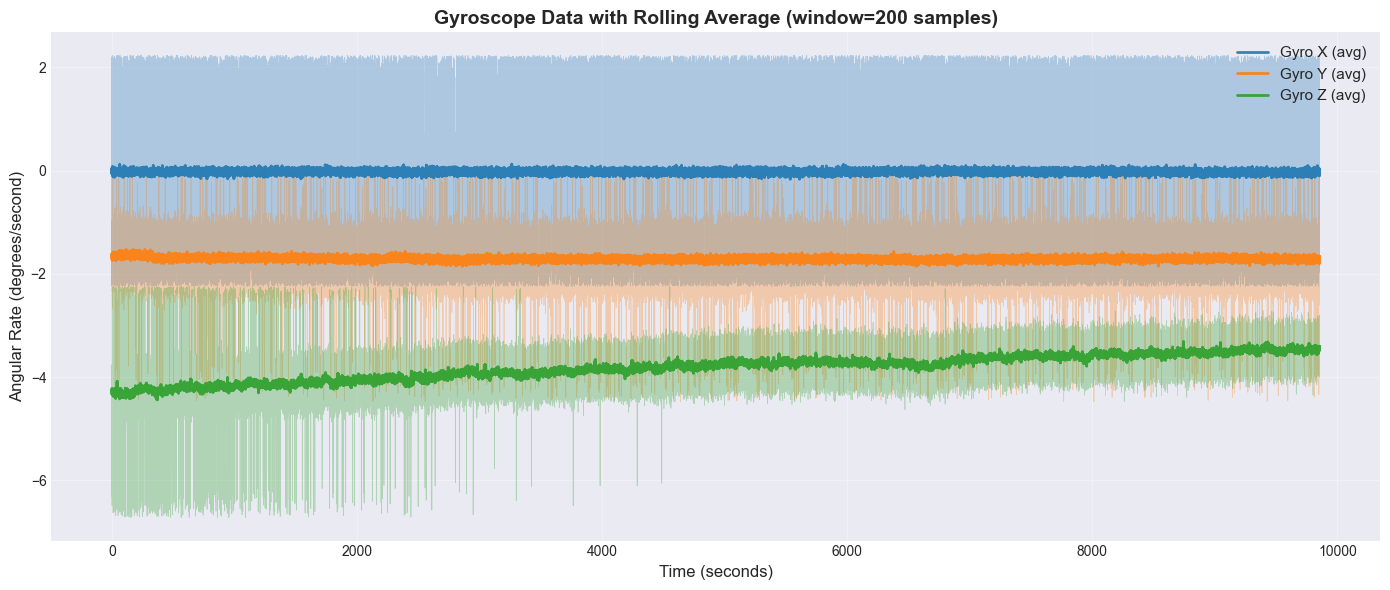

In [20]:
# Plot gyroscope with rolling average
fig, ax = plt.subplots(figsize=(14, 6))

# Raw data (lighter, thinner lines)
ax.plot(df['time_s'], df['gx_dps'], alpha=0.3, linewidth=0.5, color='C0')
ax.plot(df['time_s'], df['gy_dps'], alpha=0.3, linewidth=0.5, color='C1')
ax.plot(df['time_s'], df['gz_dps'], alpha=0.3, linewidth=0.5, color='C2')

# Rolling averages (darker, thicker lines)
ax.plot(df['time_s'], df['gx_dps_rolling'], label='Gyro X (avg)', alpha=0.9, linewidth=2, color='C0')
ax.plot(df['time_s'], df['gy_dps_rolling'], label='Gyro Y (avg)', alpha=0.9, linewidth=2, color='C1')
ax.plot(df['time_s'], df['gz_dps_rolling'], label='Gyro Z (avg)', alpha=0.9, linewidth=2, color='C2')

ax.set_xlabel('Time (seconds)', fontsize=12)
ax.set_ylabel('Angular Rate (degrees/second)', fontsize=12)
ax.set_title(f'Gyroscope Data with Rolling Average (window={window_size} samples)', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

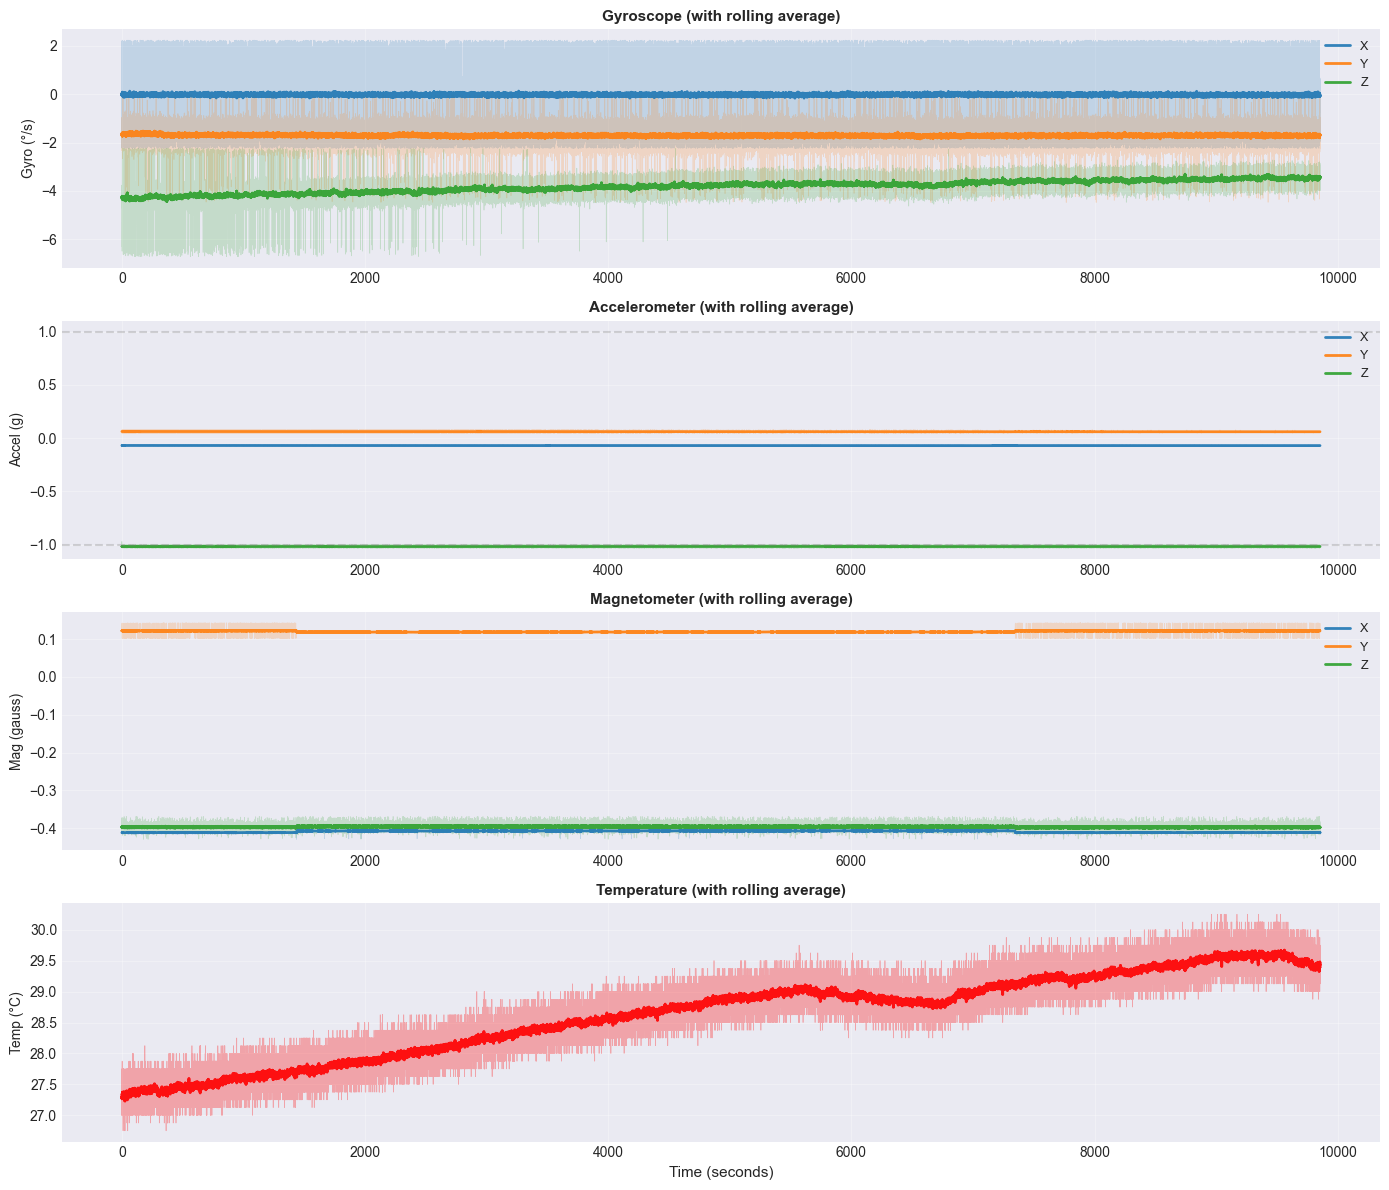

In [21]:
# Plot all sensors with rolling averages in subplots
fig, axes = plt.subplots(4, 1, figsize=(14, 12))

# Gyroscope
axes[0].plot(df['time_s'], df['gx_dps'], alpha=0.2, linewidth=0.5, color='C0')
axes[0].plot(df['time_s'], df['gy_dps'], alpha=0.2, linewidth=0.5, color='C1')
axes[0].plot(df['time_s'], df['gz_dps'], alpha=0.2, linewidth=0.5, color='C2')
axes[0].plot(df['time_s'], df['gx_dps_rolling'], label='X', alpha=0.9, linewidth=2, color='C0')
axes[0].plot(df['time_s'], df['gy_dps_rolling'], label='Y', alpha=0.9, linewidth=2, color='C1')
axes[0].plot(df['time_s'], df['gz_dps_rolling'], label='Z', alpha=0.9, linewidth=2, color='C2')
axes[0].set_ylabel('Gyro (°/s)', fontsize=10)
axes[0].set_title('Gyroscope (with rolling average)', fontsize=11, fontweight='bold')
axes[0].legend(loc='upper right', fontsize=9)
axes[0].grid(True, alpha=0.3)

# Accelerometer
axes[1].plot(df['time_s'], df['ax_g'], alpha=0.2, linewidth=0.5, color='C0')
axes[1].plot(df['time_s'], df['ay_g'], alpha=0.2, linewidth=0.5, color='C1')
axes[1].plot(df['time_s'], df['az_g'], alpha=0.2, linewidth=0.5, color='C2')
axes[1].plot(df['time_s'], df['ax_g_rolling'], label='X', alpha=0.9, linewidth=2, color='C0')
axes[1].plot(df['time_s'], df['ay_g_rolling'], label='Y', alpha=0.9, linewidth=2, color='C1')
axes[1].plot(df['time_s'], df['az_g_rolling'], label='Z', alpha=0.9, linewidth=2, color='C2')
axes[1].axhline(y=1.0, color='gray', linestyle='--', alpha=0.3)
axes[1].axhline(y=-1.0, color='gray', linestyle='--', alpha=0.3)
axes[1].set_ylabel('Accel (g)', fontsize=10)
axes[1].set_title('Accelerometer (with rolling average)', fontsize=11, fontweight='bold')
axes[1].legend(loc='upper right', fontsize=9)
axes[1].grid(True, alpha=0.3)

# Magnetometer
axes[2].plot(df['time_s'], df['mx_gauss'], alpha=0.2, linewidth=0.5, color='C0')
axes[2].plot(df['time_s'], df['my_gauss'], alpha=0.2, linewidth=0.5, color='C1')
axes[2].plot(df['time_s'], df['mz_gauss'], alpha=0.2, linewidth=0.5, color='C2')
axes[2].plot(df['time_s'], df['mx_gauss_rolling'], label='X', alpha=0.9, linewidth=2, color='C0')
axes[2].plot(df['time_s'], df['my_gauss_rolling'], label='Y', alpha=0.9, linewidth=2, color='C1')
axes[2].plot(df['time_s'], df['mz_gauss_rolling'], label='Z', alpha=0.9, linewidth=2, color='C2')
axes[2].set_ylabel('Mag (gauss)', fontsize=10)
axes[2].set_title('Magnetometer (with rolling average)', fontsize=11, fontweight='bold')
axes[2].legend(loc='upper right', fontsize=9)
axes[2].grid(True, alpha=0.3)

# Temperature
axes[3].plot(df['time_s'], df['temp_c'], alpha=0.3, linewidth=0.5, color='red')
axes[3].plot(df['time_s'], df['temp_c_rolling'], alpha=0.9, linewidth=2, color='red')
axes[3].set_ylabel('Temp (°C)', fontsize=10)
axes[3].set_xlabel('Time (seconds)', fontsize=11)
axes[3].set_title('Temperature (with rolling average)', fontsize=11, fontweight='bold')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()